In [9]:
%pip install python-dateutil
%pip install pandas
%pip install matplotlib
%pip install sklearn
%pip install statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.stattools import adfuller
from numpy import log

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\USER\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\USER\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\USER\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\USER\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\Users\USER\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


In [10]:
df1 = pd.read_csv('Data_Emission.csv')
df1 = df1.query("Country == 'Indonesia' | Country == 'Argentina' | Country == 'United Kingdom' | Country == 'Brazil' | Country == 'Canada' | Country == 'United States' | Country == 'Italy' | Country == 'France' | Country == 'Germany' | Country == 'South Africa' | Country == 'Japan' | Country == 'Mexico' | Country == 'Saudi Arabia' | Country == 'Turkey' | Country == 'Australia' | Country == 'China' | Country == 'India'")
df1 = df1.drop('Data source', axis=1)
df1 = df1.drop('Sector', axis=1)
df1 = df1.drop('Gas', axis=1)
df1 = df1.drop('Unit', axis=1)

ss = StandardScaler()
warnings.filterwarnings("ignore")

def GenerateMonthlyEmissionData(Dataframe):
  years = 28

  dfm = pd.DataFrame(columns=['Emission Amount'])
  df_old = Dataframe
  i = 0
  j = 0
  k = 0
  counter = 0

  monthIndex = []

  while(years!=0):
    months = 12
    j = i + 1

    start_emission = df_old['Emission Amount'].iloc[i]
    if(i < 27):
      end_emission = df_old['Emission Amount'].iloc[j]
    else:
      monthIndex.append(counter+1)
      dfn = pd.DataFrame(monthIndex, columns = ['Month'])
      dfm['Month'] = dfn['Month']
      result = dfm
      result.set_index('Month')
      return result

    diff = end_emission - start_emission
    divdiff = round(diff / 12,2) # 11 -> months - 1

    dfm.loc[k] = start_emission

    m = 0

    while(months!=0):
      m = m + 1
      k = k + 1

      monthincrement = divdiff * m
      noise = np.random.normal(0, 0.1)
      dfm.loc[k] =  round(start_emission + monthincrement + noise,2)
      months = months - 1
      counter = counter + 1
      monthIndex.append(counter)

    i = i + 1
    years = years - 1


# ---------------------- PREPARING FOR MONTHLY GENERATION -------------------------#

df1_IND = df1.query("Country == 'Indonesia'")

t1_IND = df1_IND.transpose()
t1_IND = t1_IND.reset_index()
t1_IND = t1_IND.drop([0])
t1_IND = t1_IND.rename(columns = {"index":'Year',5:"Emission Amount"})
x_IND = GenerateMonthlyEmissionData(t1_IND)

df1_ARG = df1.query("Country == 'Argentina'")

t1_ARG = df1_ARG.transpose()
t1_ARG = t1_ARG.reset_index()
t1_ARG = t1_ARG.drop([0])
t1_ARG = t1_ARG.rename(columns = {"index":'Year',30:"Emission Amount"})
x_ARG = GenerateMonthlyEmissionData(t1_ARG)

df1_ENG = df1.query("Country == 'United Kingdom'")

t1_ENG = df1_ENG.transpose()
t1_ENG = t1_ENG.reset_index()
t1_ENG = t1_ENG.drop([0])
t1_ENG = t1_ENG.rename(columns = {"index":'Year',19:"Emission Amount"})
x_ENG = GenerateMonthlyEmissionData(t1_ENG)

df1_BRZ = df1.query("Country == 'Brazil'")

t1_BRZ = df1_BRZ.transpose()
t1_BRZ = t1_BRZ.reset_index()
t1_BRZ = t1_BRZ.drop([0])
t1_BRZ = t1_BRZ.rename(columns = {"index":'Year',8:"Emission Amount"})
x_BRZ = GenerateMonthlyEmissionData(t1_BRZ)

df1_CAN = df1.query("Country == 'Canada'")

t1_CAN = df1_CAN.transpose()
t1_CAN = t1_CAN.reset_index()
t1_CAN = t1_CAN.drop([0])
t1_CAN = t1_CAN.rename(columns = {"index":'Year',11:"Emission Amount"})
x_CAN = GenerateMonthlyEmissionData(t1_CAN)

df1_USA = df1.query("Country == 'United States'")

t1_USA = df1_USA.transpose()
t1_USA = t1_USA.reset_index()
t1_USA = t1_USA.drop([0])
t1_USA = t1_USA.rename(columns = {"index":'Year',2:"Emission Amount"})
x_USA = GenerateMonthlyEmissionData(t1_USA)

df1_ITA = df1.query("Country == 'Italy'")

t1_ITA = df1_ITA.transpose()
t1_ITA = t1_ITA.reset_index()
t1_ITA = t1_ITA.drop([0])
t1_ITA = t1_ITA.rename(columns = {"index":'Year',21:"Emission Amount"})
x_ITA = GenerateMonthlyEmissionData(t1_ITA)

df1_FRC = df1.query("Country == 'France'")

t1_FRC = df1_FRC.transpose()
t1_FRC = t1_FRC.reset_index()
t1_FRC = t1_FRC.drop([0])
t1_FRC = t1_FRC.rename(columns = {"index":'Year',24:"Emission Amount"})
x_FRC = GenerateMonthlyEmissionData(t1_FRC)

df1_GRM = df1.query("Country == 'Germany'")

t1_GRM = df1_GRM.transpose()
t1_GRM = t1_GRM.reset_index()
t1_GRM = t1_GRM.drop([0])
t1_GRM = t1_GRM.rename(columns = {"index":'Year',9:"Emission Amount"})
x_GRM = GenerateMonthlyEmissionData(t1_GRM)

df1_SAF = df1.query("Country == 'South Africa'")

t1_SAF = df1_SAF.transpose()
t1_SAF = t1_SAF.reset_index()
t1_SAF = t1_SAF.drop([0])
t1_SAF = t1_SAF.rename(columns = {"index":'Year',16:"Emission Amount"})
x_SAF = GenerateMonthlyEmissionData(t1_SAF)

df1_JPN = df1.query("Country == 'Japan'")

t1_JPN = df1_JPN.transpose()
t1_JPN = t1_JPN.reset_index()
t1_JPN = t1_JPN.drop([0])
t1_JPN = t1_JPN.rename(columns = {"index":'Year',6:"Emission Amount"})
x_JPN = GenerateMonthlyEmissionData(t1_JPN)

df1_MXC = df1.query("Country == 'Mexico'")

t1_MXC = df1_MXC.transpose()
t1_MXC = t1_MXC.reset_index()
t1_MXC = t1_MXC.drop([0])
t1_MXC = t1_MXC.rename(columns = {"index":'Year',15:"Emission Amount"})
x_MXC = GenerateMonthlyEmissionData(t1_MXC)

df1_ARB = df1.query("Country == 'Saudi Arabia'")

t1_ARB = df1_ARB.transpose()
t1_ARB = t1_ARB.reset_index()
t1_ARB = t1_ARB.drop([0])
t1_ARB = t1_ARB.rename(columns = {"index":'Year',14:"Emission Amount"})
x_ARB = GenerateMonthlyEmissionData(t1_ARB)

df1_TUR = df1.query("Country == 'Turkey'")

t1_TUR = df1_TUR.transpose()
t1_TUR = t1_TUR.reset_index()
t1_TUR = t1_TUR.drop([0])
t1_TUR = t1_TUR.rename(columns = {"index":'Year',18:"Emission Amount"})
x_TUR = GenerateMonthlyEmissionData(t1_TUR)

df1_AUS = df1.query("Country == 'Australia'")

t1_AUS = df1_AUS.transpose()
t1_AUS = t1_AUS.reset_index()
t1_AUS = t1_AUS.drop([0])
t1_AUS = t1_AUS.rename(columns = {"index":'Year',17:"Emission Amount"})
x_AUS = GenerateMonthlyEmissionData(t1_AUS)

df1_CHN = df1.query("Country == 'China'")

t1_CHN = df1_CHN.transpose()
t1_CHN = t1_CHN.reset_index()
t1_CHN = t1_CHN.drop([0])
t1_CHN = t1_CHN.rename(columns = {"index":'Year',1:"Emission Amount"})
x_CHN = GenerateMonthlyEmissionData(t1_CHN)

df1_INA = df1.query("Country == 'India'")

t1_INA = df1_INA.transpose()
t1_INA = t1_INA.reset_index()
t1_INA = t1_INA.drop([0])
t1_INA = t1_INA.rename(columns = {"index":'Year',4:"Emission Amount"})
x_INA = GenerateMonthlyEmissionData(t1_INA)

# ---------------------- RETURNING TO ORIGINAL FORMAT -------------------------#

x_IND.rename(columns={'Emission Amount': 'Indonesia'}, inplace=True)
x_IND.drop(columns='Month', inplace=True)
trx_IND = x_IND.transpose()

x_ARG.rename(columns={'Emission Amount': 'Argentina'}, inplace=True)
x_ARG.drop(columns='Month', inplace=True)
trx_ARG = x_ARG.transpose()

x_ENG.rename(columns={'Emission Amount': 'United Kingdom'}, inplace=True)
x_ENG.drop(columns='Month', inplace=True)
trx_ENG = x_ENG.transpose()

x_BRZ.rename(columns={'Emission Amount': 'Brazil'}, inplace=True)
x_BRZ.drop(columns='Month', inplace=True)
trx_BRZ = x_BRZ.transpose()

x_CAN.rename(columns={'Emission Amount': 'Canada'}, inplace=True)
x_CAN.drop(columns='Month', inplace=True)
trx_CAN = x_CAN.transpose()

x_USA.rename(columns={'Emission Amount': 'United States'}, inplace=True)
x_USA.drop(columns='Month', inplace=True)
trx_USA = x_USA.transpose()

x_ITA.rename(columns={'Emission Amount': 'Italy'}, inplace=True)
x_ITA.drop(columns='Month', inplace=True)
trx_ITA = x_ITA.transpose()

x_FRC.rename(columns={'Emission Amount': 'France'}, inplace=True)
x_FRC.drop(columns='Month', inplace=True)
trx_FRC = x_FRC.transpose()

x_GRM.rename(columns={'Emission Amount': 'Germany'}, inplace=True)
x_GRM.drop(columns='Month', inplace=True)
trx_GRM = x_GRM.transpose()

x_SAF.rename(columns={'Emission Amount': 'South Africa'}, inplace=True)
x_SAF.drop(columns='Month', inplace=True)
trx_SAF = x_SAF.transpose()

x_JPN.rename(columns={'Emission Amount': 'Japan'}, inplace=True)
x_JPN.drop(columns='Month', inplace=True)
trx_JPN = x_JPN.transpose()

x_MXC.rename(columns={'Emission Amount': 'Mexico'}, inplace=True)
x_MXC.drop(columns='Month', inplace=True)
trx_MXC = x_MXC.transpose()

x_ARB.rename(columns={'Emission Amount': 'Saudi Arabia'}, inplace=True)
x_ARB.drop(columns='Month', inplace=True)
trx_ARB = x_ARB.transpose()

x_TUR.rename(columns={'Emission Amount': 'Turkey'}, inplace=True)
x_TUR.drop(columns='Month', inplace=True)
trx_TUR = x_TUR.transpose()

x_AUS.rename(columns={'Emission Amount': 'Australia'}, inplace=True)
x_AUS.drop(columns='Month', inplace=True)
trx_AUS = x_AUS.transpose()

x_CHN.rename(columns={'Emission Amount': 'China'}, inplace=True)
x_CHN.drop(columns='Month', inplace=True)
trx_CHN = x_CHN.transpose()

x_INA.rename(columns={'Emission Amount': 'India'}, inplace=True)
x_INA.drop(columns='Month', inplace=True)
trx_INA = x_INA.transpose()


Ndf = pd.concat([trx_IND,trx_ARG,trx_ENG,trx_BRZ,trx_CAN,trx_USA,trx_ITA,trx_FRC,trx_GRM,trx_SAF,trx_JPN,trx_MXC,trx_ARB,trx_TUR,trx_AUS,trx_CHN,trx_INA], axis = 0)

Ndf = Ndf.reset_index()
Ndf.rename(columns={'index': 'Country'}, inplace=True)

# ---------------------- PREPARING FOR STATIONARITY TEST -------------------------#

Statestdf = Ndf.copy()
Statestdf.drop(columns='Country',inplace=True)

LIST_CarbonEmission = [x_IND,x_ARG,x_ENG,x_BRZ,x_CAN,x_USA,x_ITA,x_FRC,x_GRM,x_SAF,x_JPN,x_MXC,x_ARB,x_TUR,x_AUS,x_CHN,x_INA]



test = Statestdf.copy()

test = ss.fit_transform(test)
test = pd.DataFrame(test)

test = test.transpose()
test = test.reset_index()
test = test.rename(columns={test.columns[0]: 'Date'})



base_date = pd.Timestamp('1990-12-01')
test['Date'] = base_date + test.index.to_series().apply(lambda x: relativedelta(months=x))
test.set_index('Date',inplace = True)

new_column_names = ['Indonesia','Argentina','United Kingdom','Brazil','Canada','United States','Italy','France','Germany','South Africa','Japan','Mexico','Saudi Arabia','Turkey','Australia','China','India']
test.rename(columns=dict(zip(test.columns, new_column_names)), inplace=True)

max_shift = 5

for country in test.columns:
    if country != 'Date':
        for shift_value in range(1, max_shift + 1):
            new_column_name = f'{country}_Lag_{shift_value}'
            test[new_column_name] = test[country].shift(shift_value)

test.dropna(inplace=True)

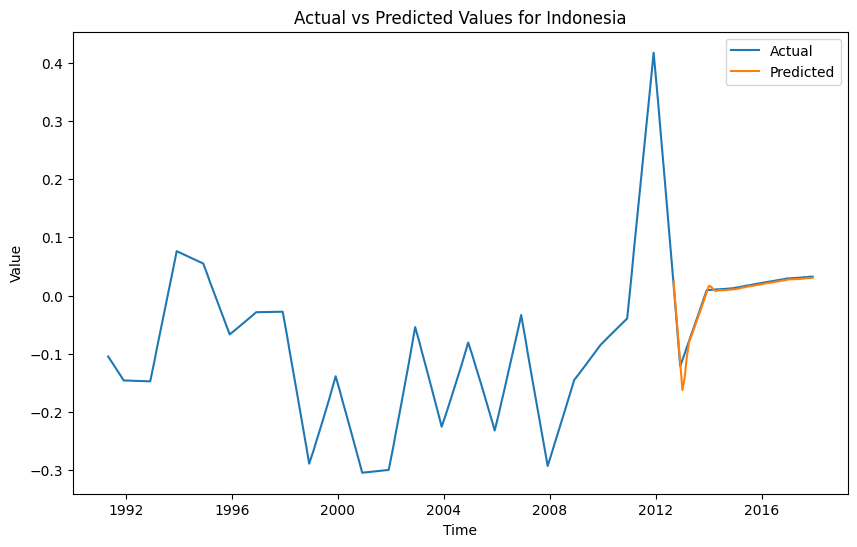

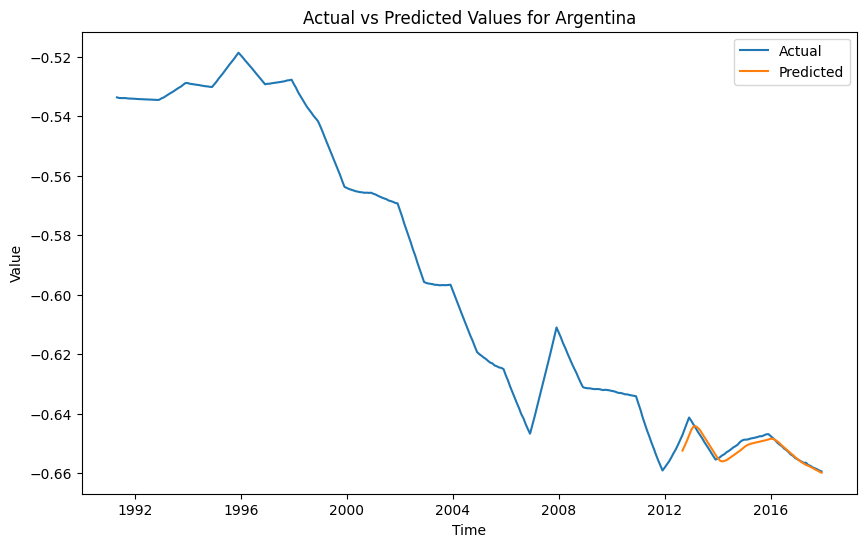

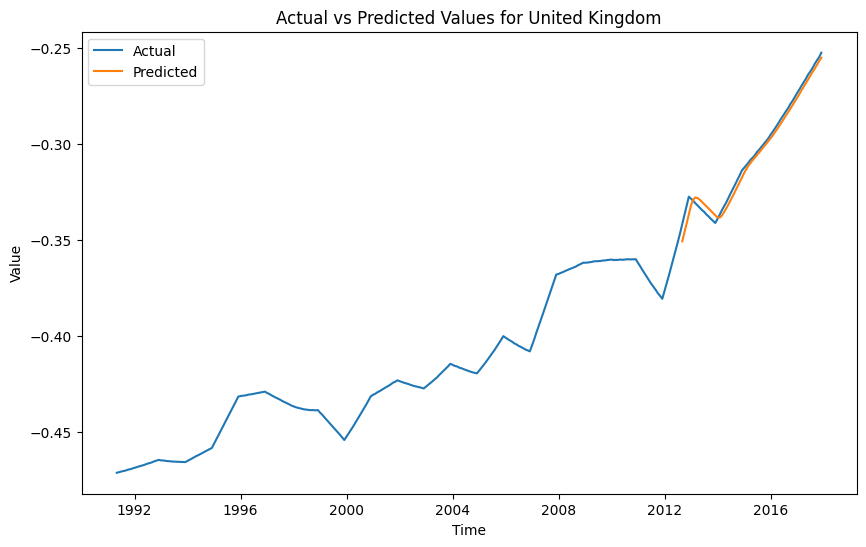

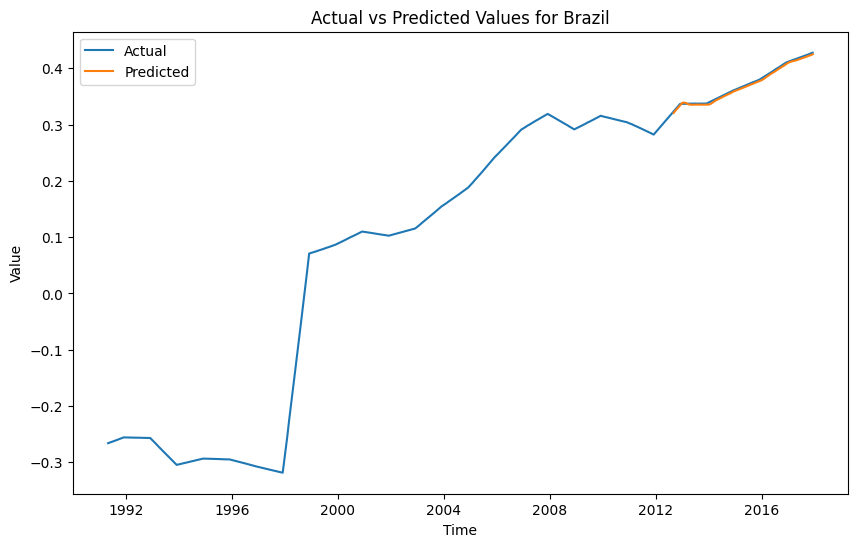

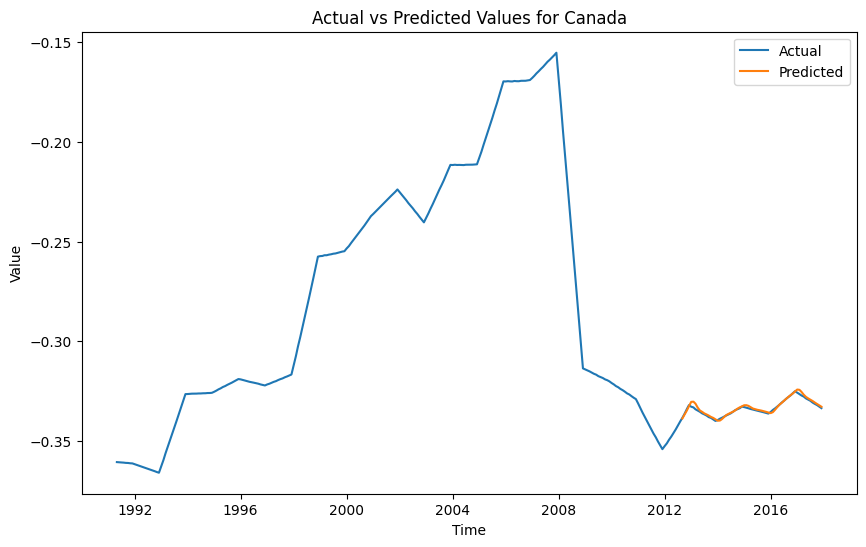

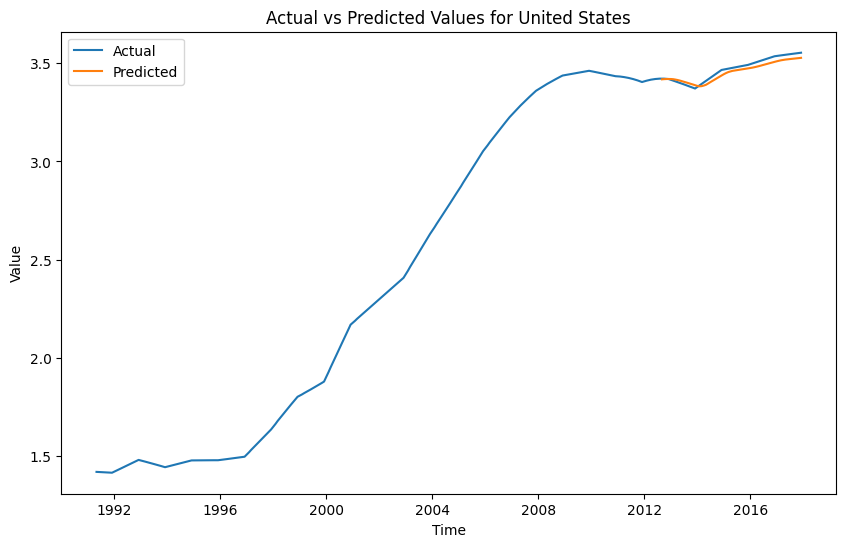

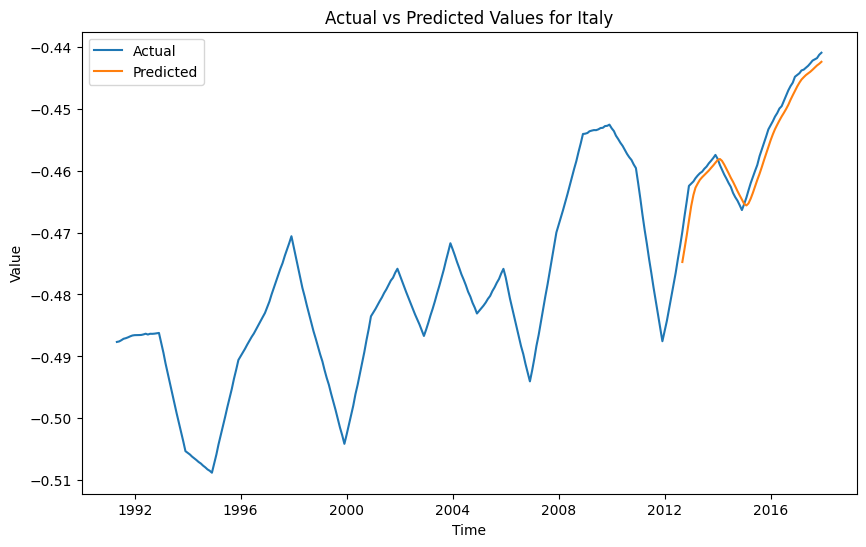

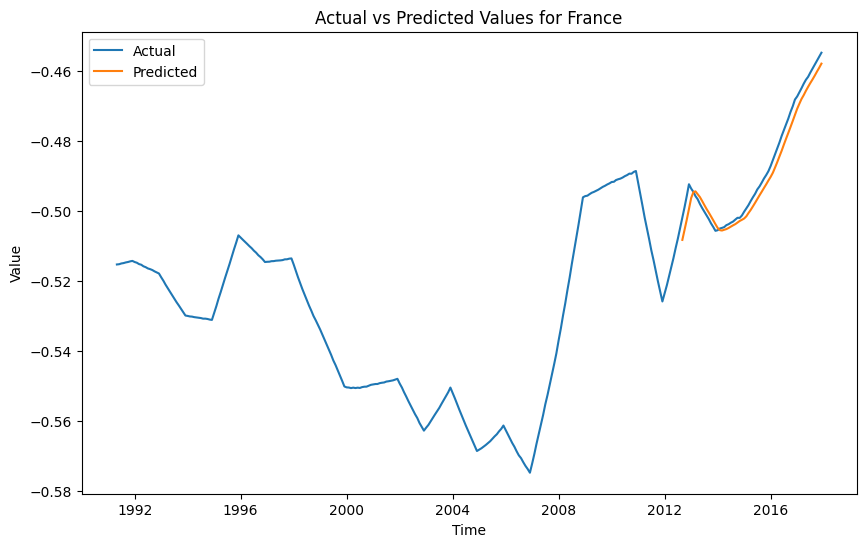

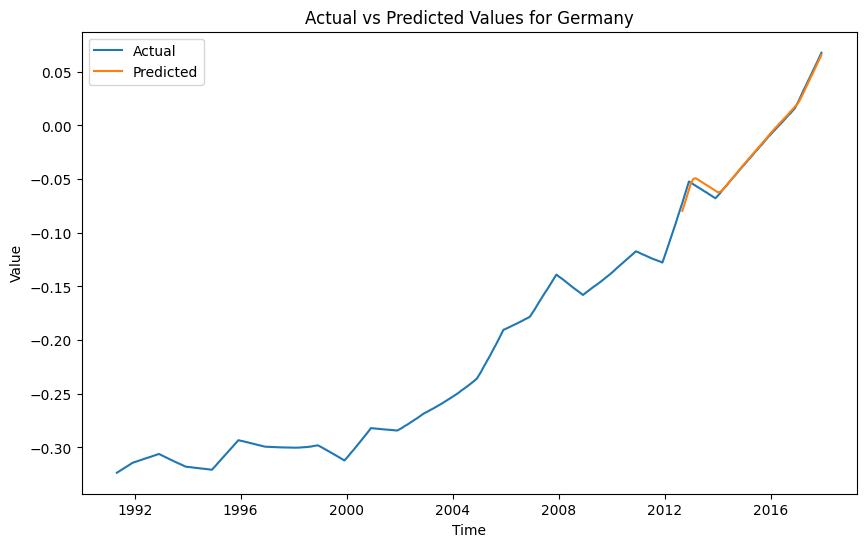

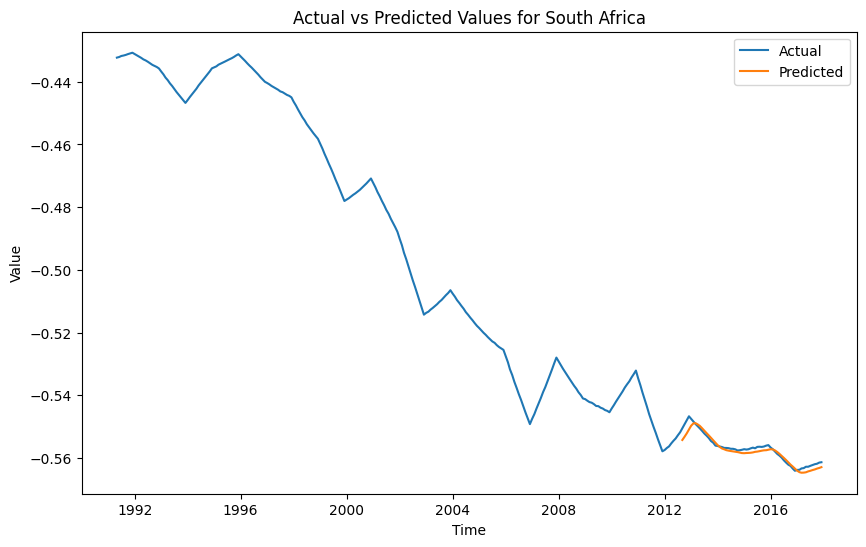

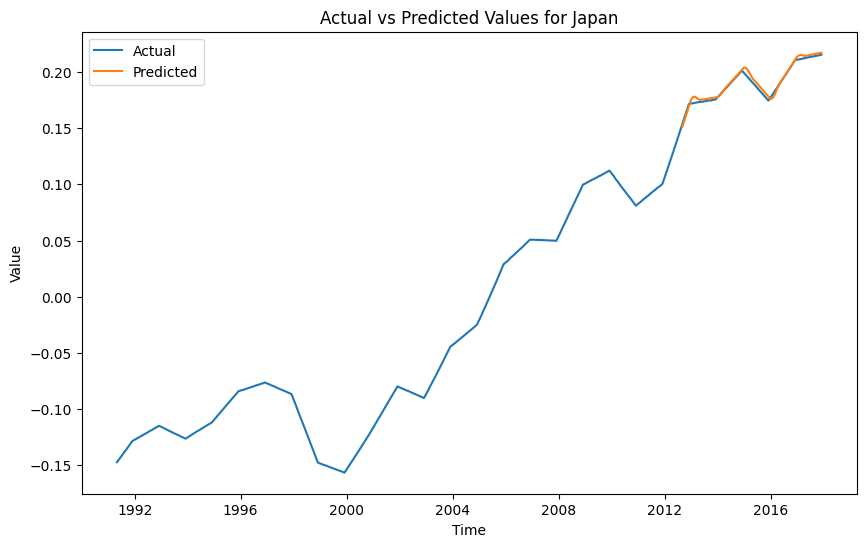

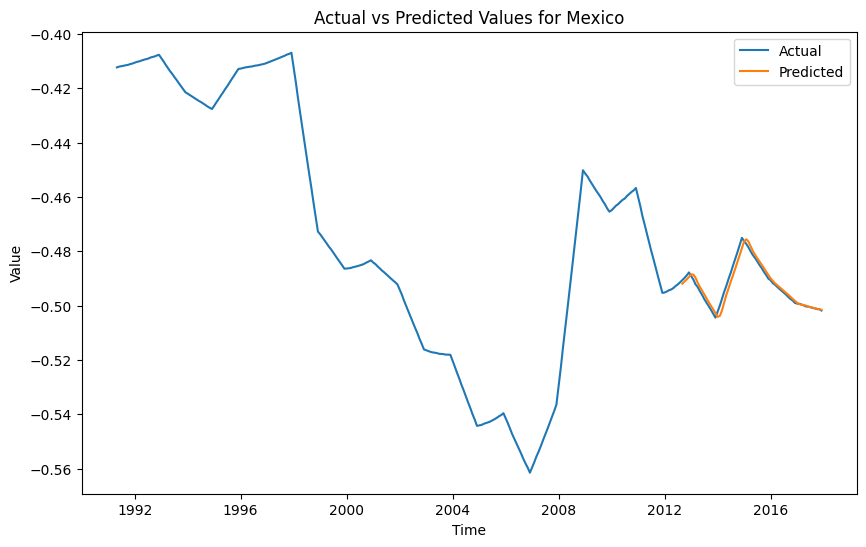

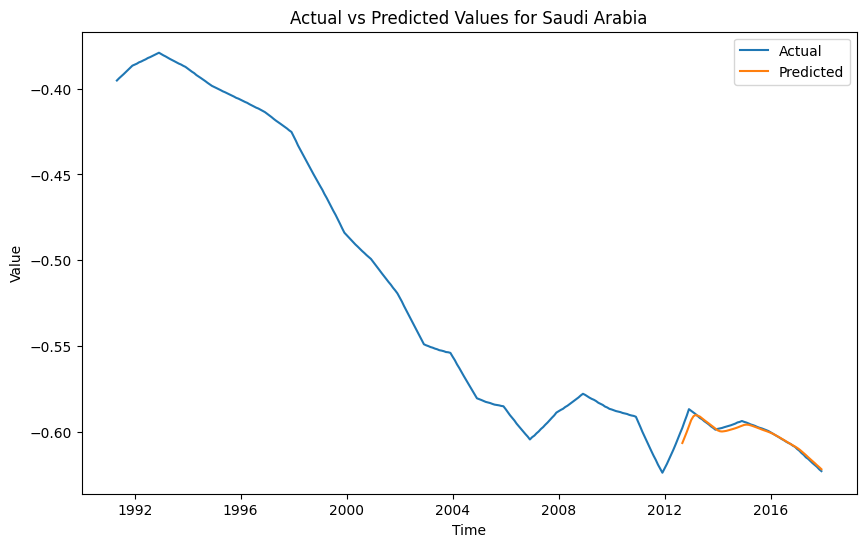

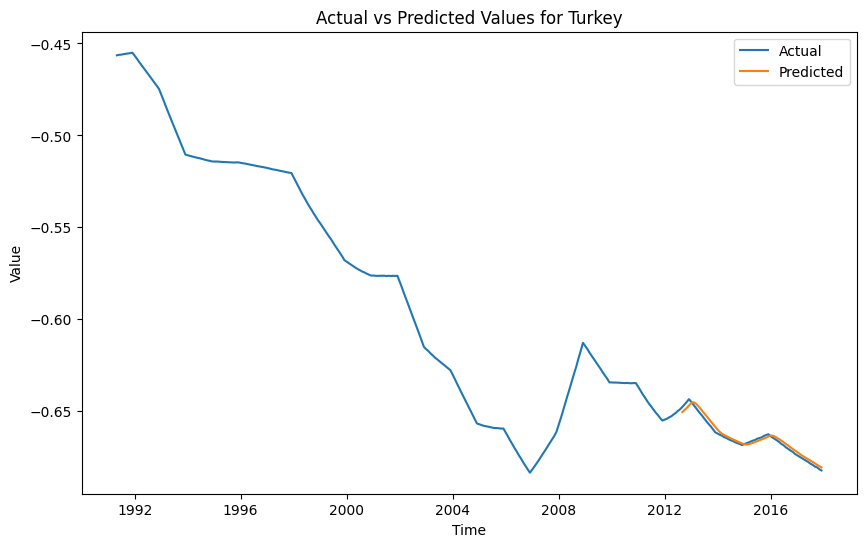

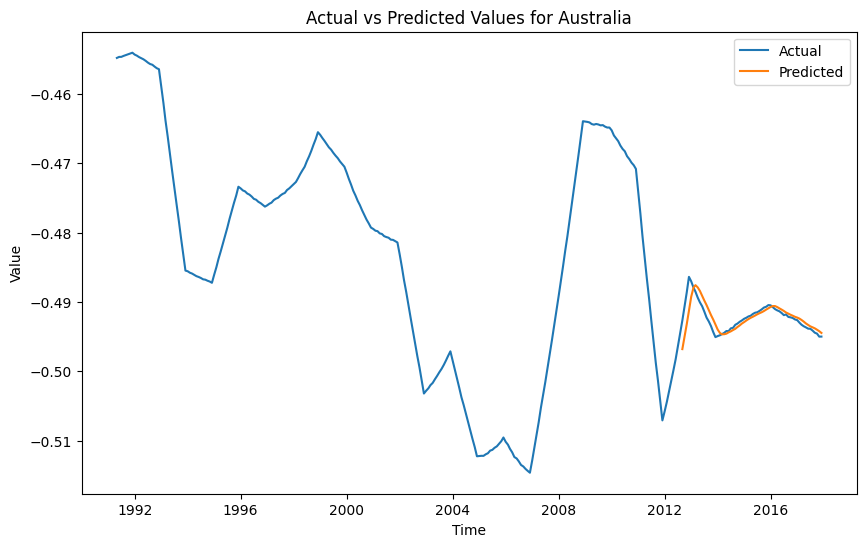

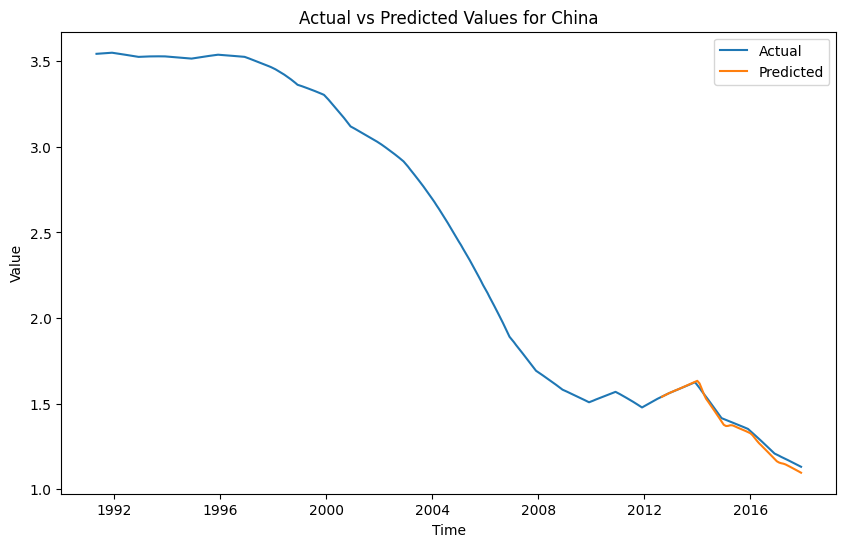

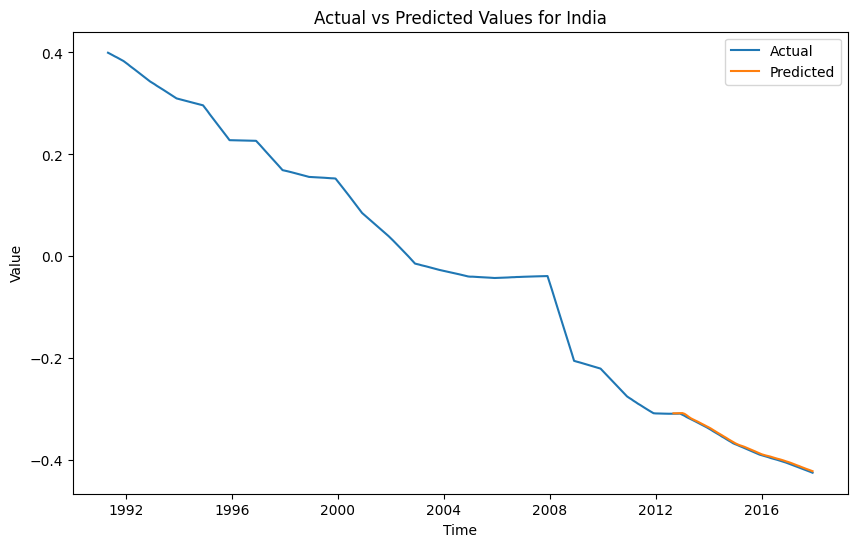

RMSE for Indonesia: 0.008989934867597527
RMSE for Argentina: 0.0020786762845314854
RMSE for United Kingdom: 0.0034767298847265707
RMSE for Brazil: 0.0025469776235864617
RMSE for Canada: 0.0009263180595546907
RMSE for United States: 0.020353583778731962
RMSE for Italy: 0.0022307135141883217
RMSE for France: 0.003106905566177447
RMSE for Germany: 0.003607501818495652
RMSE for South Africa: 0.0014349509985934759
RMSE for Japan: 0.002664568364275204
RMSE for Mexico: 0.0018702430128599054
RMSE for Saudi Arabia: 0.002740585323105605
RMSE for Turkey: 0.00181798706575518
RMSE for Australia: 0.0013788635979616697
RMSE for China: 0.022263015466051778
RMSE for India: 0.002393915183924871


In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

MLPdata = test.copy()
MLPdata.head()

countries = MLPdata.columns[0:]

X_columns_range = 6
X_columns = [f'{country}_Lag_{lag}' for country in countries for lag in range(1, X_columns_range)]

# print(X_columns)

x_range = 85 #85 if its 5 differenced, 65ish when 4 differenced
y_range = 17

X_columns = X_columns[:x_range]
Y_columns = countries[:y_range]

X = MLPdata[X_columns]
y = MLPdata[Y_columns]


rmse_dict = {}

n = -5
m = 0

for country in Y_columns:
  n = n + 5
  m = m + 5
  X_country_columns = X_columns[n:m]

  X_country = X[X_country_columns]
  y_country = y[country]

  split_index = int(len(X_country) * 0.8)

  X_train = X_country[:split_index]
  X_test = X_country[split_index:]
  y_train = y_country[:split_index]
  y_test = y_country[split_index:]

  activation = 'tanh'
  solver = 'adam'
  batch_size = 'auto'
  learning_rate = 'adaptive'
  learning_rate_init = 0.001
  power_t = 0.5
  tol = 1e-8
  verbose = False
  warm_start = True
  momentum = 0.7
  nesterovs_momentum = True
  early_stopping = False
  validation_fraction = 0.2
  beta_1 = 0.9
  beta_2 = 0.999
  epsilon = 1e-8
  n_iter_no_change = 10
  max_fun = 15000
  max_iter = 500
  alpha = 0.0001
  random_state = 42

  mlp_regressor = MLPRegressor(hidden_layer_sizes=(1000, 1000),
                               activation = activation,
                               solver = solver,
                               batch_size = batch_size,
                               learning_rate = learning_rate,
                               learning_rate_init = learning_rate_init,
                               power_t = power_t,
                               tol = tol,
                               verbose = verbose,
                               warm_start = warm_start,
                               momentum = momentum,
                               nesterovs_momentum = nesterovs_momentum,
                               early_stopping = early_stopping,
                               validation_fraction = validation_fraction,
                               beta_1 = beta_1,
                               beta_2 = beta_2,
                               epsilon = epsilon,
                               n_iter_no_change = n_iter_no_change,
                               max_fun = max_fun,
                               max_iter = max_iter,
                               alpha = alpha,
                               random_state = random_state)
  mlp_regressor.fit(X_train, y_train)
  y_pred = mlp_regressor.predict(X_test)

  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  rmse_dict[country] = rmse

  plt.figure(figsize=(10, 6))
  plt.plot(y_country.index, y_country, label='Actual')
  plt.plot(y_test.index, y_pred, label='Predicted')
  plt.legend()
  plt.xlabel('Time')
  plt.ylabel('Value')
  plt.title(f'Actual vs Predicted Values for {country}')
  plt.show()


for country, rmse in rmse_dict.items():
    print(f"RMSE for {country}: {rmse}")



In [5]:
%pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
You should consider upgrading via the 'c:\Users\USER\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [12]:
import pickle as pkl

filename = 'model.pkl'

with open(filename, 'wb') as file:
    pkl.dump(mlp_regressor, file)

In [13]:
%pip install streamlit

import streamlit as st
import joblib

  Attempting uninstall: attrs
    Found existing installation: attrs 21.4.0
    Uninstalling attrs-21.4.0:
      Successfully uninstalled attrs-21.4.0
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\USER\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [14]:
print(pd.__version__)
print(np.__version__)
print(st.__version__)
print(joblib.__version__)

2.2.2
1.26.4
1.35.0
1.4.2


In [18]:
# print(X_train)
# print(y_train)

X_train.head()

,India_Lag_1,India_Lag_2,India_Lag_3,India_Lag_4,India_Lag_5
Date,,,,,
1991-05-01,0.401734,0.404009,0.406253,0.408437,0.410694
1991-06-01,0.399455,0.401734,0.404009,0.406253,0.408437
1991-07-01,0.397189,0.399455,0.401734,0.404009,0.406253
1991-08-01,0.394878,0.397189,0.399455,0.401734,0.404009
1991-09-01,0.392420,0.394878,0.397189,0.399455,0.401734
